# **Vector Store**
One of the most common ways to store and search over unstructured data is to embed it and store the resulting embedding vectors, and then at query time to embed the unstructured query and retrieve the embedding vectors that are 'most similar' to the embedded query. A vector store takes care of storing embedded data and performing vector search for you.

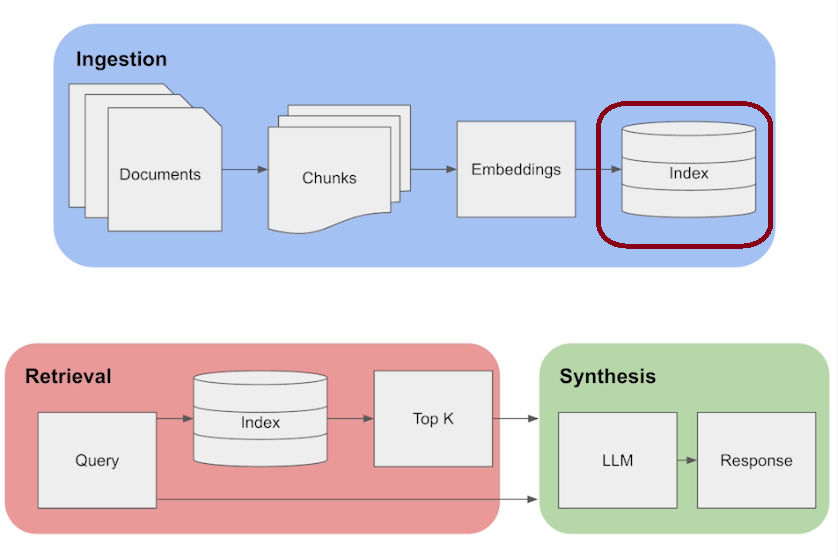

## How Data is Stored in VectorDB
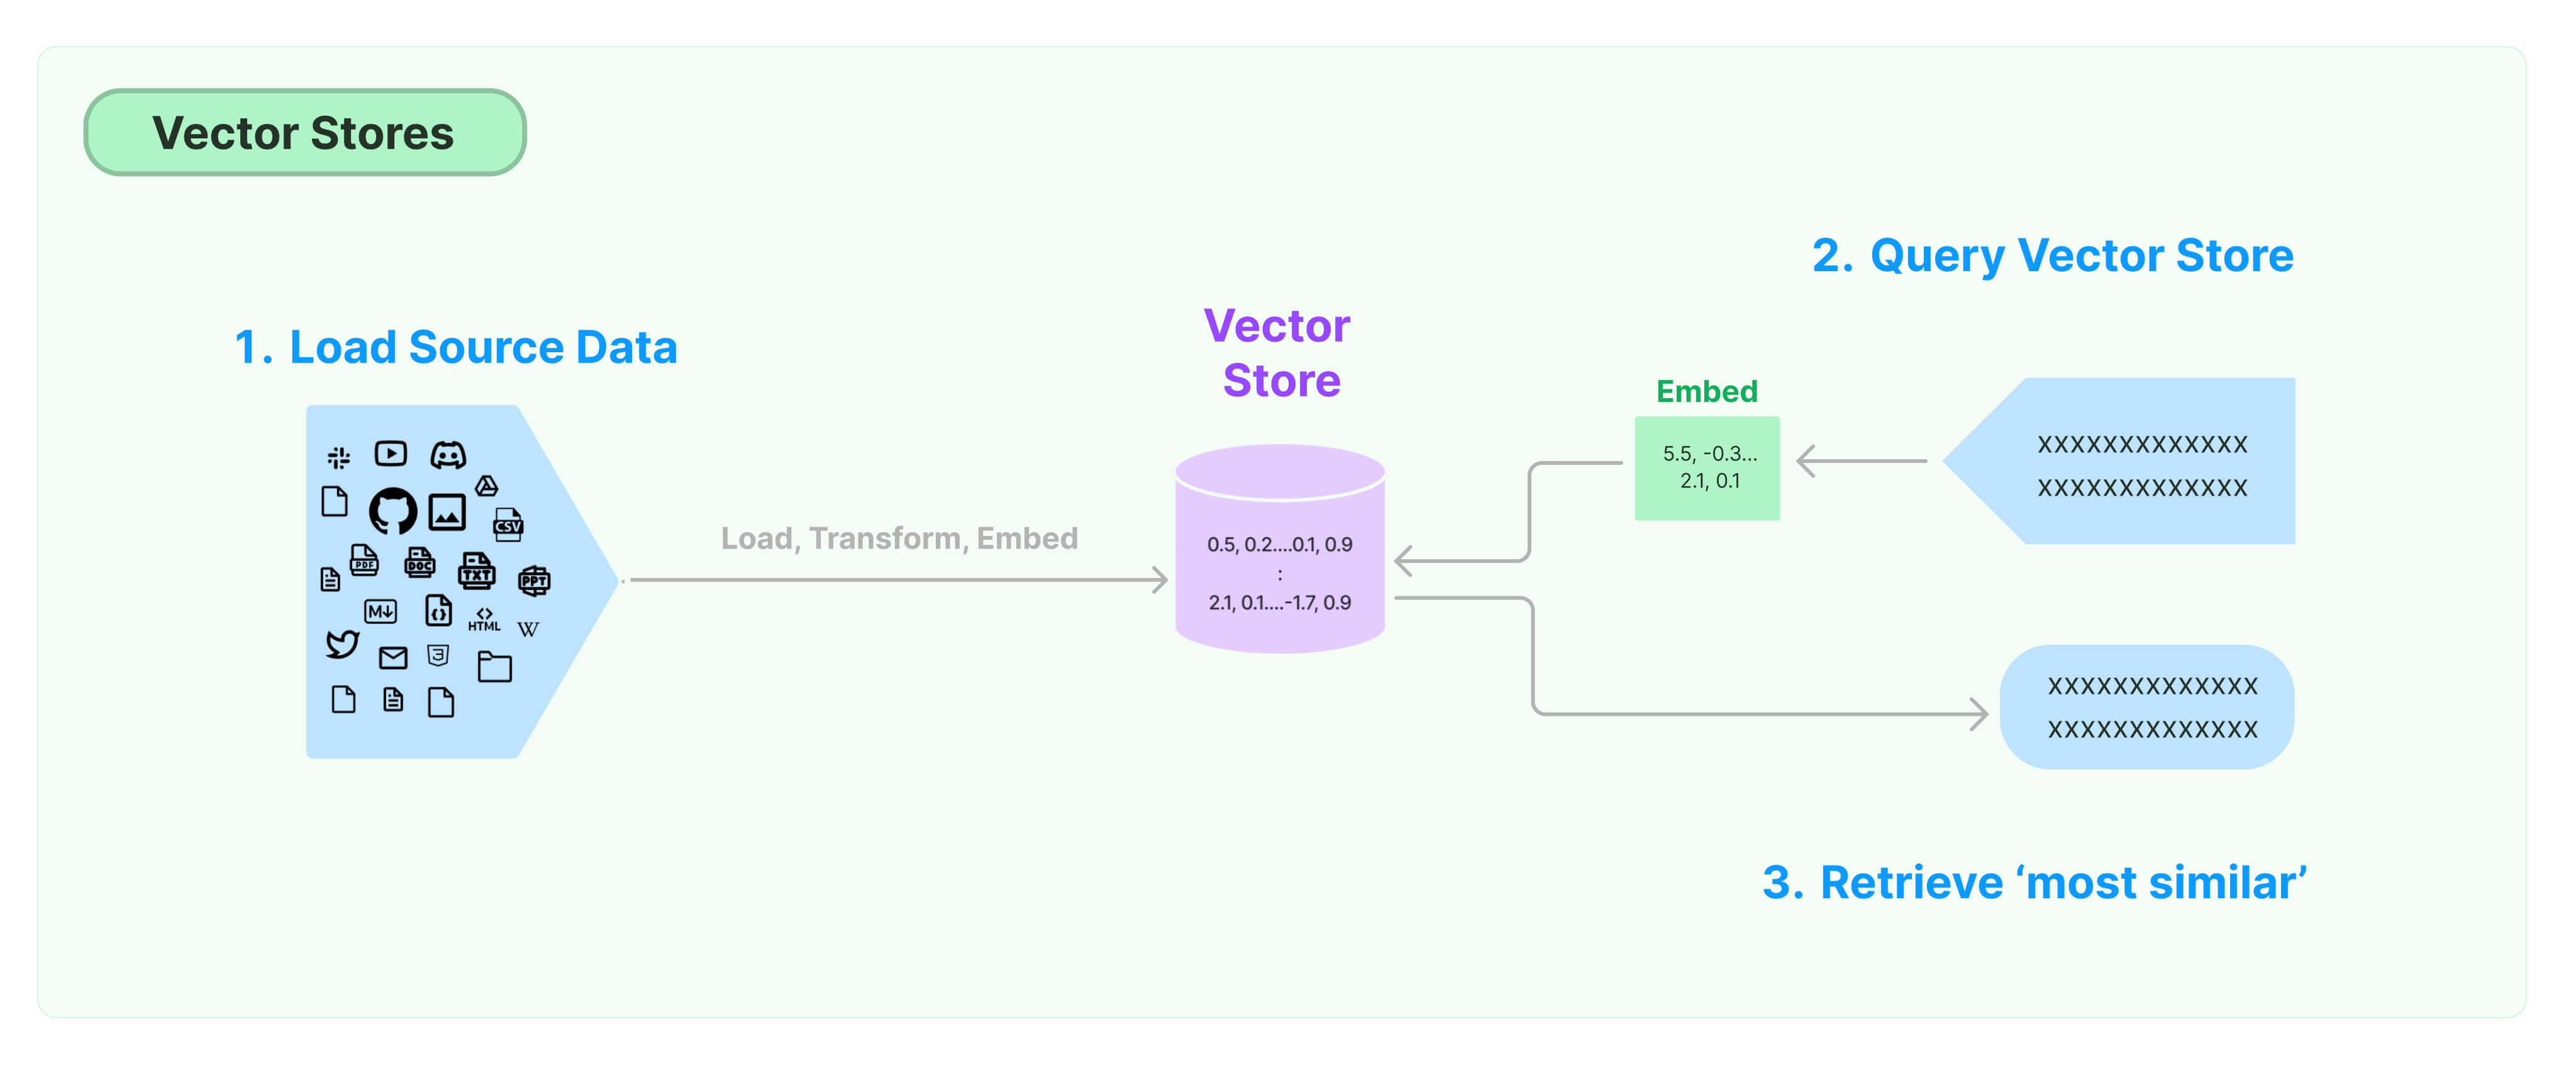

In [ ]:
!pip install qdrant_client langchain_huggingface langchain-community langchain-qdrant pypdf openai langchain transformers langchain_huggingface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.5/373.5 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.5/2

In [ ]:
from qdrant_client import QdrantClient
from langchain_core.documents import Document
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain_qdrant import QdrantVectorStore
import openai
import os

## **Embedding Model**

Dimensions 384

Max Input Token 512

In [ ]:
# Initialize embedding model with BAAI/bge-small-en-v1.5
embed_model = HuggingFaceEmbeddings(model_name='BAAI/bge-small-en-v1.5')


<ipython-input-3-3d4ca37c1a92>:2: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  embed_model = HuggingFaceEmbeddings(model_name='BAAI/bge-small-en-v1.5')
/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## **Loading the Data**

In [ ]:
# Load the PDF document using PyPDFLoader
loaders = PyPDFLoader("/content/National_AI_Policy_Consultation_Draft_1722220582.pdf")

# Extract pages from the loaded PDF
pages = loaders.load()


In [ ]:
pages[15]

Document(metadata={'source': '/content/National_AI_Policy_Consultation_Draft_1722220582.pdf', 'page': 15}, page_content=" \n \n1 \n 4 Policy Directives  \nThe policy directives are minimalistic, focusing  on resolving issues and achieving targets set for stimulating \ngrowth in AI across the board. Empathizing with  the common  person's journey  for different aspects \nassociated with their socio -economic development and well -being in the current technological disruption \nis driven through the following developmental pillars.  \n4.1 1st Pillar: AI Market Enablement  \n4.1.1  National Artificial Intelligence Fund (NA IF)  \nGiven the evidence regarding the state of AI in Pakistan, the projected global outlook of AI in terms of its \nuse and market size, the impact of AI on the local ecosystem , and claiming its demographic share through \nresponsible use of data, the Ministry  of IT & Telecom through its underutilized resources and funds aims \nto establish a National AI Fund with fo

In [ ]:
len(pages)

41

## **Splitting the Document into Chuncks**

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1500,
    chunk_overlap = 150
)

## **Meta Data preprocessing**

In [ ]:
from langchain.docstore.document import Document


In [ ]:
# Create an empty list to store processed document chunks
doc_list = []

# Iterate over each page in the extracted pages
for page in pages:
    # Split the page content into smaller chunks
    pg_split = text_splitter.split_text(page.page_content)

    # Iterate over each chunk and create Document objects
    for pg_sub_split in pg_split:
        # Metadata for each chunk, including source and page number
        metadata = {"source": "AI policy", "page_no": page.metadata["page"] + 1}

        # Create a Document object with content and metadata
        doc_string = Document(page_content=pg_sub_split, metadata=metadata)

        # Append the Document object to the list
        doc_list.append(doc_string)

In [ ]:
doc_list[10]

Document(metadata={'source': 'AI policy', 'page_no': 6}, page_content='6 \n 1 Executive  Summary  \nPakistan has a unique opportunity to harness digital disruption by educating an eager young population \nthat can potentially propel the n ation onto a growth trajectory to sustain our future national \ncompetitiveness and improve the lives of citizens. Artificial Intelligence (AI) represents the next frontier of \ntechnological opportunities, and it has been widely proven and understood that the  collection, processing, \nuse, and exchange of data through automated/intelligent means would drive the entire society into the \nnext stage of its evolution which is unprecedented and requires a progressive , yet careful approach. So, \nafter a thorough analysi s of the global perspective and based on the evidence collected through more \nextensive consultations with the stakeholders, the Ministry of IT & Telecom has come to a much -desired \nconclusion that it needs to chalk out a development

In [ ]:
len(doc_list)

103

## **Qdrant Vectore Store**

### **Qdrant Credentials**

In [ ]:
qdrant_url = "-"
qdrant_key = "-"
collection_name = "AI_policy_new"

In [ ]:
# Initialize QdrantVectorStore with documents and embedding model
qdrant = QdrantVectorStore.from_documents(
    doc_list,                # List of Document objects to be stored in the vector store
    embed_model,             # Embedding model used to convert documents into vectors
    url=qdrant_url,          # URL for the Qdrant service
    api_key=qdrant_key,      # API key for accessing the Qdrant service
    collection_name=collection_name  # Name of the collection to store the vectors in
)

## Query Vector Store
Once your vector store has been created and the relevant documents have been added you will most likely wish to query it during the running of your chain or agent.

### Query directly
The simplest scenario for using Qdrant vector store is to perform a similarity search. Under the hood, our query will be encoded into vector embeddings and used to find similar documents in Qdrant collection.

In [ ]:
query = "what is Ai policy for students?"

# Retrieve relevant documents
results = qdrant.similarity_search(query, k=5)

In [ ]:
results[3]

Document(metadata={'source': 'AI policy', 'page_no': 6, '_id': 'd022222e-eae7-4d5c-87a3-459669e64dcd', '_collection_name': 'AI_policy_new'}, page_content='through industry -academia collaborations and investments in AI-led initiatives. The National AI Policy is \ncrafted to focus on the equitable distribution o f opportunity and its responsible use , having the following \ndefining attributes.  \n• Evidence -Based and Target Oriented  \n• User -Centric and Forward -Looking  \n• Objective and Overarching  \nThe AI policy further aims to augment AI and allied technologies through balanced demand and supply -\nside interventions , as briefly described below.   \n• Market Enablement - Establishment  of research & innovation cent ers in AI for developing, test -\nbedding, deploying, and scaling AI solutions.  This includes learning how to improve govern ance  \nand manage the impact of AI.  \n• Progressive  and Trusted Environment – Responsible  use of AI to generate economic gains and \nim

In [ ]:
results[0].page_content

'4.2.3  Algorithms, Data Science  & AI in Basic Education  \nI. Where the policy document emphasizes the funda mental  understanding and awareness of \npersonal data protection and AI, it also aims to stimulate  an incremental impact of AI on society \nright from the grassroots . Therefore, the policy has given equal importance to teach ing algorithms, \ndata science , and AI in basic STEM education . In this regard, it stipulates that. CoE-AI shall  hire a \nlocal/international consultant with expertise in high -tech curriculum development to develop a \nNational Curriculum in Algorithms, Data Sciences, AI , and Allied Technologies from the sixth to the  \ntwelfth standard.'

## **Pinecone Vector Store**

In [ ]:
%pip install -qU langchain-pinecone pinecone-notebooks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.8/244.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.6/117.6 kB 6.1 MB/s eta 0:00:00


### **Pinecone credentials**

In [ ]:
PINECONE_API_KEY="2d256283-3bbc-4669-93b3-b824eacebfde"
index_name="demo-vectorstore"

### **Data Upsertion in Pinecone**

In [ ]:
from langchain_pinecone import PineconeVectorStore as lang_pinecone
import os
os.environ["PINECONE_API_KEY"] = PINECONE_API_KEY

In [ ]:
# Convert documents into vectors using LangPinecone
vector = lang_pinecone.from_documents(
    doc_list,                # List of Document objects to be converted into vectors
    embed_model,             # Embedding model used for generating vector representations
    index_name=index_name    # Name of the Pinecone index where vectors will be stored
)

**Query vectorstore**

In [ ]:
# Define a query to search for relevant information
query = "What is AI policy for students?"

# Perform similarity search to find the top 5 most relevant results
pinecone_results = vector.similarity_search(query, k=5)


In [ ]:
pinecone_results

[Document(metadata={'page_no': 25.0, 'source': 'AI policy'}, page_content='4.2.3  Algorithms, Data Science  & AI in Basic Education  \nI. Where the policy document emphasizes the funda mental  understanding and awareness of \npersonal data protection and AI, it also aims to stimulate  an incremental impact of AI on society \nright from the grassroots . Therefore, the policy has given equal importance to teach ing algorithms, \ndata science , and AI in basic STEM education . In this regard, it stipulates that. CoE-AI shall  hire a \nlocal/international consultant with expertise in high -tech curriculum development to develop a \nNational Curriculum in Algorithms, Data Sciences, AI , and Allied Technologies from the sixth to the  \ntwelfth standard.'),
 Document(metadata={'page_no': 25.0, 'source': 'AI policy'}, page_content='4.2.3  Algorithms, Data Science  & AI in Basic Education  \nI. Where the policy document emphasizes the funda mental  understanding and awareness of \npersonal data

In [ ]:
pinecone_results[3].page_content

'policies.  \nIX. Develop regulation policies and standards for data -sharing among countries and lead multilateral \ndiplomatic efforts to arra nge such agreements.  \nX. Encourage local businesses to embrace new AI solutions and provide them with a platform for \ntechnical support and some incentives and regulations. Moreover, it should catalyze the creation \nof new businesses based on AI technology throu gh start -up funds and incubation centers . \nXI. Formulate policies to develop and maintain highly resilient cutting -edge computing, storage, and \nconnectivity infrastructure.  \nXII. Participate in international efforts to bring standardization in all aspects of AI, e.g. , data formats, \nnetwork and systems architecture, data , application integration protocols, requirements on test \ncases, and services.  \nXIII. Develop a data -sharing framework  and use AI algorithms consistent with social, cultural, and \nreligious norms and internatio nal guidelines.  \nXIV. A governance 